# RRS: Rating Reviews System Based on Sentiment Analysis

In [1]:
#The Dark Knight (2008)

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementNotVisibleException
from bs4 import BeautifulSoup
import time
import urllib.request
from selenium import webdriver

In [3]:
 driver = webdriver.Chrome("C:\Webdriver/chromedriver.exe")
driver.get("https://www.imdb.com/title/tt0468569/reviews?ref_=tt_ql_3")

button = driver.find_element_by_id('load-more-trigger')
key = True
while key:
    time.sleep(1)
    try:
        button.click()
        button = driver.find_element_by_id('load-more-trigger')
    except:
        key = False

In [4]:
html = driver.page_source
soup = BeautifulSoup(html.encode("utf-8"), "html.parser")
TheDarkKnight = soup.find_all('div', class_ = 'content')

In [5]:
print(type(TheDarkKnight))
print(len(TheDarkKnight))

<class 'bs4.element.ResultSet'>
6664


In [7]:
brothListReviewsOnly = []
brothList = soup.select(".review-container")
temp = 1
for item in range(0,len(brothList)):
    title = brothList[item].select(".title")[0].text
    review = brothList[item].select(".text")[0].text
    brothListReviewsOnly.append(review)
    file = open(r'C:\Users\Saeed\Desktop\KDM_Project_updated\AllReviews_beforeCleaning\r' +str(temp) +'.txt', 'w', encoding='utf-8')
    temp = temp+1
#     print(review +"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    file.write(str(review))
file.close()

In [8]:
print(len(brothListReviewsOnly))

6664


In [9]:


import string
translator = str.maketrans('', '', string.punctuation)
brothList = soup.select(".review-container")
for item in range(0,len(brothList)):
    review = brothList[item].select(".text")[0].text.translate(translator)
    brothListReviewsOnly[item] = review.translate(translator)

In [10]:
brothListReviewsOnly[1]

'A brilliant tense movie from the beginning to the end in which tells the story of the rising new menace in Gotham city known only as the Joker and how the Dark Knight has to reach his limits trying to control the havoc he breaks in Gotham cityThe movie is an extraordinary piece of the filmmaking art in all its aspects the plot is carefully and smartly written as a intricately wrought canvas the character development is very satisfying the movie was shot well and nicely directed the epic score fits the scenes and add up to the whole visual experience the acting was intense by all cast where each fit their role perfectly specially Heath Ledger who managed after all these years of having the Joker around in comic books animations TV series and even movies to literally bring this complicated character with all its twisted brilliant sadistic dark and sometimes funny personality to live on the big screen This is the last movie that Heath Ledger filmed completely and I believe some how he sa

In [11]:
len(str(brothListReviewsOnly))

8512337

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import pos_tag, word_tokenize

In [13]:
#part2

stop = set(stopwords.words('english'))
temp = 1
for x in range(0,len(brothListReviewsOnly)):             
    filtered_words = [i for i in word_tokenize(brothListReviewsOnly[x].lower()) if i not in stop]
    brothListReviewsOnly[x] = " ".join(filtered_words)
    file = open(r'C:\Users\Saeed\Desktop\KDM_Project_updated\AllReviews_afterCleaning\r' +str(temp) +'.txt', 'w', encoding='utf-8')
    temp = temp + 1
    file.write(str(brothListReviewsOnly[x]))
file.close()

In [14]:
brothListReviewsOnly[1]

'brilliant tense movie beginning end tells story rising new menace gotham city known joker dark knight reach limits trying control havoc breaks gotham citythe movie extraordinary piece filmmaking art aspects plot carefully smartly written intricately wrought canvas character development satisfying movie shot well nicely directed epic score fits scenes add whole visual experience acting intense cast fit role perfectly specially heath ledger managed years joker around comic books animations tv series even movies literally bring complicated character twisted brilliant sadistic dark sometimes funny personality live big screen last movie heath ledger filmed completely believe saved best last managed put outstanding final act realistic joker managed put smile faces death brings curtains talent'

In [15]:
len(brothListReviewsOnly)

6664

# Using Textnlob

## The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [19]:
import os

path = r"C:\Users\Saeed\Desktop\KDM_Project_updated\AllReviews_afterCleaning"

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

ab = []
for f in files:
    with open(f, 'r', encoding="utf8") as f:
        first_line = f.readline()
        ab.append(first_line)
print(ab[1])

want best movie great story great acting thrilling twist watched joker 2019 come back give dark knight 10 thanks heath ledger exceptional performs


### Applying Textblob 

In [20]:
from textblob import TextBlob
def sentiment(message):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(message)
    # set sentiment
    return (analysis.sentiment)

### Applying Textblob in review by review

In [21]:
for a in ab:
    print(sentiment(a))

Sentiment(polarity=0.28703703703703703, subjectivity=0.548148148148148)
Sentiment(polarity=0.3962962962962963, subjectivity=0.48888888888888893)
Sentiment(polarity=-0.034259259259259225, subjectivity=0.5694444444444444)
Sentiment(polarity=0.23427375256322622, subjectivity=0.5261090225563906)
Sentiment(polarity=0.2733024691358025, subjectivity=0.5549382716049384)
Sentiment(polarity=0.2748106060606061, subjectivity=0.49193404634581106)
Sentiment(polarity=0.31923076923076926, subjectivity=0.5192307692307693)
Sentiment(polarity=0.51, subjectivity=0.4854545454545454)
Sentiment(polarity=0.2405859398817145, subjectivity=0.5535851472471192)
Sentiment(polarity=0.23674658674658675, subjectivity=0.6389499389499391)
Sentiment(polarity=0.1216450216450216, subjectivity=0.5296536796536796)
Sentiment(polarity=-0.021354166666666664, subjectivity=0.5538194444444444)
Sentiment(polarity=0.32298136645962744, subjectivity=0.5029934437543131)
Sentiment(polarity=0.009663120567375911, subjectivity=0.5388424518

### Applying Textblob in all reviews at once 

In [22]:
#part2

stop = set(stopwords.words('english'))
text = ab
c = str([word.encode('utf-8') for word in text if word not in stop])

print(sentiment(c))

Sentiment(polarity=0.1775442847794497, subjectivity=0.5342265764876558)


### Getting the numbers of positive and negative reviews and append them in each file

In [23]:
import os

path = r"C:\Users\Saeed\Desktop\KDM_Project_updated\AllReviews_afterCleaning"

In [24]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))

In [25]:
reviews_from_file = []

#with open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\all_Reviews.txt','w', encoding='utf8', errors='ignore') as f:
for x in files:
    with open(x,'r', encoding='utf8', errors='ignore') as y:
        #first_line = x.readline()
        for text in y:
            reviews_from_file.append(text)
            #f.write(text)
#f.close()

In [21]:
#sent = reviews_from_file[50]
#sent = "I like this project"

In [26]:
with open('C:\\Users\\Saeed\\Desktop\\KDM_Project_updated\\all_Reviews.txt','w', encoding='utf8', errors='ignore') as f:
    for x in reviews_from_file:
        f.write(x)
        f.write('\n')
    f.close()

In [23]:
# with open('C:\\Users\\Saeed\\Desktop\\KDM_Project\\all_Reviews.txt','r', encoding='utf8', errors='ignore') as f:
#     for line in f:
#         #AllReviews = review_text.splitlines()
#         print(line)
#         break

## using stanford COreNLP

In [27]:
from pycorenlp import StanfordCoreNLP
import json

In [28]:
nlp = StanfordCoreNLP('http://localhost:9000')
#Sentiment_Reviews = reviews_from_file[7]
all_review_sentiment= []
for x in range (len(reviews_from_file)):
    results = nlp.annotate(reviews_from_file[x],properties={
        'annotators':'sentiment,ner, pos',
        'outputFormat': 'json',
        'timeout': 50000
        })
    #all_review_sentiment.append(results["sentences"]["sentiment"])
    for s in results["sentences"]:
        #print(s["sentiment"])
        all_review_sentiment.append(s["sentiment"])

In [29]:
len(reviews_from_file)

6663

### calculating the number of positve and neagtive and give the rating

In [30]:
sent_dict = {}
for y in range (len(all_review_sentiment)):
    if all_review_sentiment[y] in sent_dict:
        sent_dict.update({all_review_sentiment[y]:sent_dict[all_review_sentiment[y]] + 1})
    else:
        sent_dict.update({all_review_sentiment[y]:1})
print(sent_dict)

{'Positive': 2203, 'Verynegative': 490, 'Negative': 3011, 'Neutral': 479, 'Verypositive': 480}


In [31]:
sent_negative = sent_dict['Verynegative'] + sent_dict['Negative']
print(sent_negative)

3501


In [32]:
sent_positive = sent_dict['Positive'] + sent_dict['Verypositive']
print(sent_positive)

2683


In [33]:
negative_rating = (sent_negative / len(reviews_from_file))* 10
print(int(negative_rating))

5


In [34]:
positive_rating = (sent_positive / len(reviews_from_file))* 10
print(positive_rating)

4.026714693081194


## Data Visualization

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
dfObj = pd.DataFrame(sent_dict.items(), index=['1', '2', '3', '4', '5'], 
                     columns=['class_name','rate'])
dfObj.head()

,class_name,rate
1,Positive,2203
2,Verynegative,490
3,Negative,3011
4,Neutral,479
5,Verypositive,480


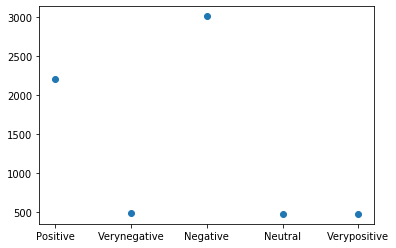

In [37]:
plt.scatter(dfObj['class_name'], dfObj['rate'])
plt.show()

C:\Users\Saeed\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


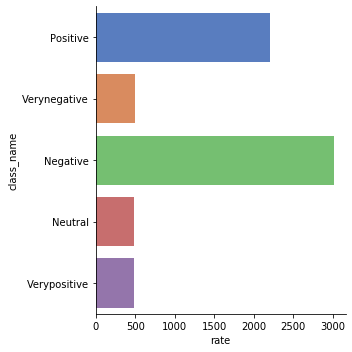

In [38]:
# Set up a factorplot
g = sns.factorplot("rate","class_name", data=dfObj, kind="bar", palette="muted", legend=False)

### Filltering the data and Tokenizing the positve and negative reviews

In [39]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [40]:
print(len(reviews_from_file))
print(len(all_review_sentiment))

6663
6663


In [41]:
def filter_data():
    
    positiveReviews = []
    negativeReviews = []
    naturalReviews = []

    for x in range(0,len(reviews_from_file)):
        word_data = nltk.word_tokenize(reviews_from_file[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        reviews_from_file[x] = " ".join(CleanWordsFormat)

    for y in range(0, len(all_review_sentiment)):
        sent_rating = all_review_sentiment[y]
        text = reviews_from_file[y] #sent_rating[1].get_text()

        if sent_rating == 'Positive' or sent_rating == 'Verypositive':
            positiveReviews.append(text)
        elif sent_rating == 'Negative' or sent_rating == 'Verynegative':
            negativeReviews.append(text)
        else:
            naturalReviews.append(text)
    return positiveReviews, negativeReviews, naturalReviews

In [42]:
positiveReviews, negativeReviews, naturalReviews = filter_data()

print(positiveReviews[0])

confidently directed dark brooding packed impressive action sequence complex story dark knight includes careerdefining turn heath ledger well oscar worthy performance tdk remains best batman movie comic book movie ever created


In [43]:
print(negativeReviews[7])

expecting see least semigood movie film even par film get 1 rating try depict batman fails miserably even action movie batman hadnt good plot horrid morbid amount gore unhealthy fight sequence badly done notable problemsa rock theme music thats constant movie come whenever suspense scene start sound like annoying electric guitar batman film also plot seems totally disconnected scene entire movie like one big mishmash 10 different story occur succession also unrealistic many time beginning joker simply take schoolbus convoy escape way avoids police broad daylight blow hospital unbelievableb joker film someone predilection violence violence alone traditionally joker nefarious insane character thing kilter normalcy laugh take unexpected delight joker like he simply disturbed psychopath like blow thing harm others there depth characterc harvey dent traditionally black last 2 decade way he made twoface movie totally wrong twoface traditionally go become crime bos movie simply dy soon coming

In [44]:
print(naturalReviews[2])

weve subjected enormous amount hype marketing dark knight weve seen joker scavenger hunt one largest viral campaign advertising history culminates actual release movieeverything thats said pretty much spot first time remember summer blockbuster film far surpasses hypefor much action movie acting make great piece work punch explosion stuntwork great dialog work actor momentsbales batman definitive batman see everything character finally film martial art skill cunning great tactical thinking forensic application technological genius advance improve luscious fox inventionstechnological breakthrough intimidating personality even little swashbucklingas heath yes get credit performance joker also recognize jonathan chris nolan writing treatment character fact ledger make joker menacing nolans given character great manifesto drive action joker stance chaos order anarchy morality average modern human make character interesting psychologically nolans drafted complex character perfect performanc

In [45]:

def tokenize_data():
    
    positiveReviews_t = []
    negativeReviews_t = []
    naturalReviews_t = [] 
    for x in range(0,len(positiveReviews)):
        word_data = nltk.word_tokenize(positiveReviews[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        positiveReviews_t.append(CleanWordsFormat)


    for x in range(0,len(negativeReviews)):
        word_data = nltk.word_tokenize(negativeReviews[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        negativeReviews_t.append(CleanWordsFormat)


    for x in range(0,len(naturalReviews)):
        word_data = nltk.word_tokenize(naturalReviews[x])
        wordnet_lemmatizer = nltk.WordNetLemmatizer()
        CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
        naturalReviews_t.append(CleanWordsFormat)
        
    return positiveReviews_t, negativeReviews_t, naturalReviews_t 


In [46]:
positiveReviews_t, negativeReviews_t, naturalReviews_t = tokenize_data()

print(positiveReviews_t[10])

['start', 'finish', 'movie', 'capture', 'take', 'movie', 'chris', 'nolan', 'done', 'fantastic', 'job', 'movie', 'go', 'history', 'book', 'best', 'superhero', 'movie', 'ever', 'actor', 'christian', 'bale', 'spectacular', 'he', 'perfect', 'man', 'perfect', 'rolebatman', 'fit', 'role', 'well', 'michael', 'caine', 'charismatic', 'classy', 'charming', 'butler', 'much', 'butler', 'mentor', 'guardian', 'young', 'man', 'desperate', 'path', 'pursue', 'save', 'people', 'love', 'caine', 'tremendously', 'good', 'morgan', 'freeman', 'always', 'terrific', 'version', 'james', 'bond', 'q', 'much', 'realistic', 'captivatingthe', 'real', 'star', 'show', 'everyones', 'saying', 'course', 'late', 'heath', 'ledger', 'he', 'sooooooooooooooooo', 'good', 'scene', 'pencil', 'trick', 'awesome', 'never', 'expected', 'hit', 'bang', 'impossible', 'good', 'he', 'proved', 'he', 'taken', 'villainy', 'whole', 'new', 'level', 'tragedy', 'died', 'think', 'couldve', 'good', 'legendary', 'marlon', 'brando', 'co', 'aaron', 

In [46]:
# negativeReviews_t = []
# for x in range(0,len(negativeReviews)):
#     word_data = nltk.word_tokenize(negativeReviews[x])
#     wordnet_lemmatizer = nltk.WordNetLemmatizer()
#     CleanWordsFormat = [wordnet_lemmatizer.lemmatize(word) for word in word_data]
#     negativeReviews_t.append(CleanWordsFormat)

In [48]:
print(negativeReviews_t[0])

['rented', 'netflix', 'forced', 'watch', 'till', 'end', 'dreadful', 'boring', 'yet', 'expensive', 'movie', 'dimly', 'lit', 'could', 'thousand', 'outofwork', 'actor', 'southern', 'california', 'perceptible', 'difference', 'guess', 'couple', 'explosion', 'would', 'helped', 'really', 'watched', 'cause', 'heath', 'ledger', 'excellent', 'performance', 'brokeback', 'mountain', 'boy', 'disappointed', 'didnt', 'care', 'anyone', 'watching', 'except', 'waiting', 'end', 'time', 'dialog', 'difficult', 'understand', 'volume', 'way', 'loud', 'soundtrack', 'made', 'every', 'sound', 'effect', 'rattle', 'furniturei', 'dont', 'get', 'pas', 'great', 'entertainment', 'nowadays', 'watch', 'old', 'rocky', 'bullwinkle', 'cartoon', 'afterward', 'intelligent', 'antidote', 'cartoonish', 'movie', 'try', 'much', 'significance', 'odd', 'combination', 'like', 'looking', 'significance', 'meaning', 'life', 'infomercial', 'dont', 'bother']


In [49]:
print(len(negativeReviews_t))

3501


In [50]:
print(len(naturalReviews_t))

479


In [51]:
file = open('C:\\Users\\Saeed\Desktop\\KDM_Project_updated\\positve_Reviews_t.txt','w', encoding='utf8', errors='ignore')
for z in range(0,len(positiveReviews_t)):
    file.write(str(positiveReviews_t[z]))
file.close()

file = open('C:\\Users\\Saeed\Desktop\\KDM_Project_updated\\negative_Reviews_t.txt','w', encoding='utf8', errors='ignore')
for f in range(0,len(negativeReviews_t)):
    file.write(str(negativeReviews_t[f]))
file.close()
  
    
file = open('C:\\Users\\Saeed\Desktop\\KDM_Project_updated\\natural_Reviews_t.txt','w', encoding='utf8', errors='ignore')   
for k in range(0,len(naturalReviews_t)):
    file.write(str(naturalReviews_t[k]))
file.close()

###  Top words

In [58]:

def count_allPositiveWords():
    
    allPositve = " ".join(positiveReviews)
    splitPositive = allPositve.split(" ")
    positiveFrequency = nltk.FreqDist(splitPositive)
    
    # print(allPositve)
    # print(" ")
    tempArray_p = []
    for word, frequency in positiveFrequency.most_common():
        tempArray_p.append(u'{}:{}'.format(word, frequency) + "\n")
        
    tempString_p = " ".join(tempArray_p)
    file = open(r'C:\\Users\\Saeed\Desktop\\KDM_Project_updated\CountWords\PositiveFreq.txt', 'w', encoding='utf-8') 
    file.write(tempString_p)
    file.close()
    return tempString_p
   

In [59]:
frq_p = count_allPositiveWords()
print(frq_p)

movie:7903
 film:3865
 batman:3808
 joker:2920
 best:2698
 one:2577
 ledger:2205
 dark:2120
 great:1967
 heath:1871
 good:1683
 knight:1624
 performance:1547
 time:1478
 ever:1436
 character:1379
 like:1284
 nolan:1177
 see:1119
 action:1087
 really:1032
 bale:1010
 well:1009
 amazing:988
 make:917
 story:892
 scene:851
 superhero:850
 acting:824
 also:816
 made:809
 actor:797
 even:791
 seen:773
 much:761
 comic:756
 would:727
 watch:704
 think:689
 role:677
 christian:659
 every:649
 way:646
 christopher:636
 perfect:634
 begin:609
 villain:605
 say:600
 first:570
 many:569
 get:561
 better:554
 book:544
 hero:534
 thing:530
 love:524
 people:522
 go:498
 dont:486
 harvey:482
 dent:466
 could:464
 fan:464
 still:459
 never:439
 greatest:434
 job:427
 everything:423
 eckhart:420
 give:416
 plot:410
 cast:402
 bruce:394
 masterpiece:393
 take:392
 brilliant:388
 work:383
 come:382
 gotham:381
 know:378
 always:376
 two:375
 life:372
 top:372
 truly:362
 feel:359
 end:356
 part:356
 osc

In [53]:
# print(allPositve)

In [56]:
def count_allNegativeWords():   
    allNegative = " ".join(negativeReviews)
    splitnegative = allNegative.split(" ")
    negativeFrequency = nltk.FreqDist(splitnegative)
    # print(allNegative)
    # print(" ")
    tempArray_n = []
    for word, frequency in negativeFrequency.most_common():
        tempArray_n.append(u'{}:{}'.format(word, frequency) + "\n")

    tempString_n = " ".join(tempArray_n)
    file = open(r'C:\\Users\\Saeed\Desktop\\KDM_Project_updated\CountWords\negativeFreq.txt', 'w', encoding='utf-8') 
    file.write(tempString_n)
    file.close()

    return tempString_n

In [57]:
frq_n = count_allNegativeWords()
print(frq_n)

movie:13135
 batman:10960
 film:8111
 joker:8069
 dark:5366
 ledger:4766
 one:4720
 knight:4374
 like:3926
 character:3598
 heath:3543
 good:3278
 time:3028
 performance:2793
 see:2551
 best:2532
 make:2380
 great:2325
 even:2304
 really:2256
 would:2217
 nolan:2159
 much:2150
 bale:2148
 action:2116
 begin:2059
 scene:2050
 dent:1984
 people:1908
 well:1851
 get:1804
 comic:1787
 story:1787
 harvey:1754
 think:1726
 also:1636
 way:1627
 gotham:1624
 say:1620
 first:1610
 ever:1577
 dont:1544
 thing:1536
 could:1524
 role:1491
 villain:1484
 made:1464
 go:1436
 better:1428
 city:1381
 bruce:1377
 two:1328
 christian:1318
 actor:1313
 know:1311
 many:1300
 wayne:1282
 every:1271
 superhero:1271
 seen:1270
 never:1229
 take:1213
 eckhart:1184
 book:1177
 acting:1163
 end:1115
 hero:1105
 new:1104
 still:1100
 christopher:1099
 plot:1098
 watch:1068
 face:1050
 give:1030
 want:998
 come:993
 didnt:991
 he:965
 im:954
 long:944
 bad:944
 going:942
 man:938
 feel:920
 aaron:913
 u:897
 litt

In [56]:
# print(allNegative)

### WordCloud/ Mask

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [64]:
mask = np.array(Image.open("C:\\Users\\Saeed\\Desktop\\KDM_Project_updated\\Twitter_mask.png"))

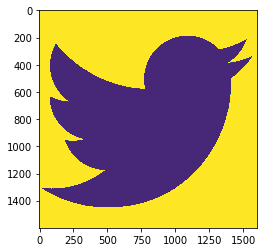

In [65]:
plt.imshow(mask)

In [75]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [76]:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [77]:
transformed_mask

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26]])

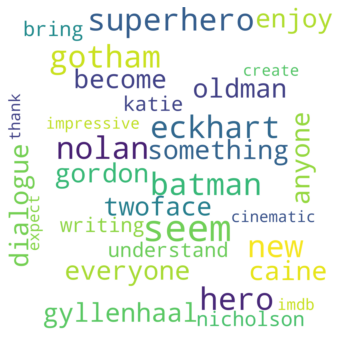

In [78]:
wordcloudPositive= WordCloud(max_words=30, mask=transformed_mask, background_color='white')
wordcloudPositive.generate(frq_p)
#plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.figure(figsize=(6,6))
plt.axis("off")
plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.savefig("positive.png")

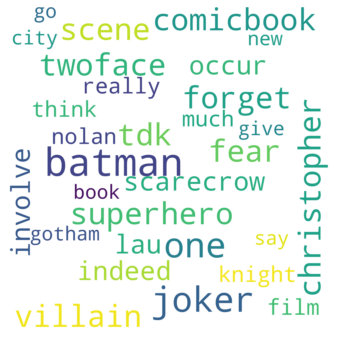

In [79]:
wordcloudNegative= WordCloud(max_words=30, mask=transformed_mask, background_color='white')
wordcloudNegative.generate(frq_n)
plt.figure(figsize=(6,6))
plt.axis("off")
plt.imshow(wordcloudNegative, interpolation = 'bilinear')
plt.savefig("Negative.png")

In [80]:
wine_mask = np.array(Image.open("C:\\Users\\Saeed\\Desktop\\KDM_Project_updated\\wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [81]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [82]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [83]:
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [90]:
from nltk.corpus import stopwords

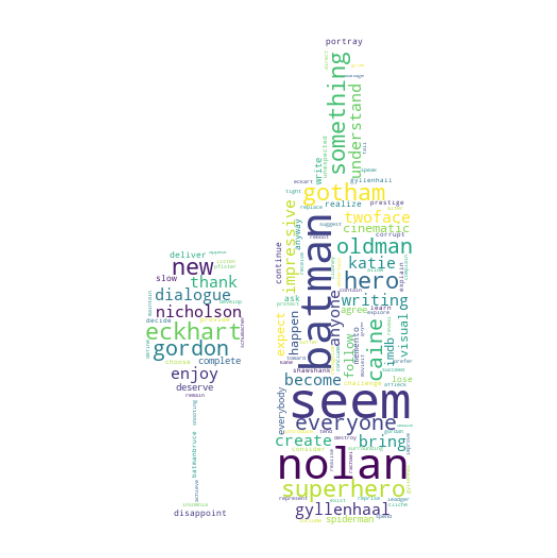

In [94]:
wordcloudPositive= WordCloud(max_words=120, mask=transformed_wine_mask, background_color='white', contour_color='firebrick')
wordcloudPositive.generate(frq_p)
#plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.savefig("positive.png")

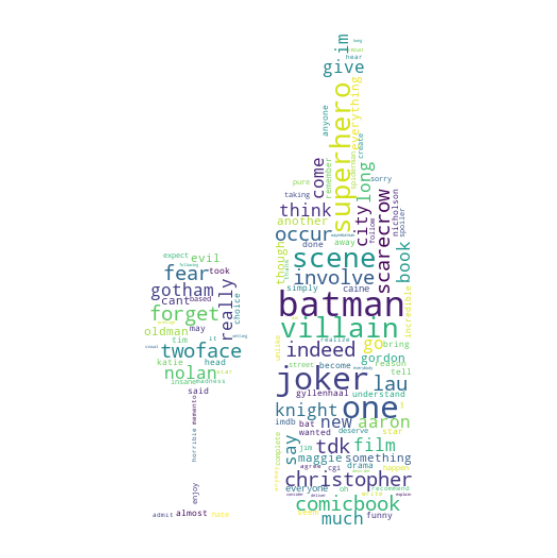

In [95]:
wordcloudPositive= WordCloud(max_words=120, mask=transformed_wine_mask, background_color='white', contour_color='firebrick')
wordcloudPositive.generate(frq_n)
#plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloudPositive, interpolation = 'bilinear')
plt.savefig("positive.png")